# Task 2 - METHODS, FUNCTIONS, AND ATTRIBUTES

In [1]:
import pandas as pd

In [1]:
def parse_dataset(year):
    file_path = f'./data/yob{year}.txt'
    df_temp = pd.read_csv(file_path, names=['name', 'gender', 'frequency'])
    df_temp['year'] = year
    return df_temp

In [2]:
df = pd.DataFrame(columns=['name', 'gender', 'frequency', 'year'])

NameError: name 'pd' is not defined

In [3]:
for year in range(1880, 2021):
    df_temp = parse_dataset(year)
    df = pd.concat([df, df_temp])
    

    

NameError: name 'pd' is not defined

In [19]:
pd.read_csv('../data/all_names_babys.csv')

,name,gender,frequency,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
4045111,Zykier,M,5,2020
4045112,Zylus,M,5,2020
4045113,Zymari,M,5,2020
4045114,Zyn,M,5,2020


# Task 3 - FILTERING DATAFRAMES
    

In [6]:
import pandas as pd

In [17]:

# 1. Read in data:

pd.read_csv('../data/all_names_babys.csv')
df = pd.read_csv('../data/all_names_babys.csv')


In [49]:
# 2. Create a boolean mask for the name 'Martin'. It should just be a Series of True and False values.

martin_filter = df['name'] == 'Martin'
martin_filter

0          False
1          False
2          False
3          False
4          False
           ...  
4045111    False
4045112    False
4045113    False
4045114    False
4045115    False
Name: name, Length: 4045116, dtype: bool

In [50]:
# 3. Use this boolean mask to filter your original DataFrame and display a DataFrame which only has babies names 'Martin'. 

df.loc[martin_filter]


,name,gender,frequency,year
986,Martin,M,357,1880
2986,Martin,M,357,1880
4983,Martin,M,327,1881
7009,Martin,M,387,1882
9160,Martin,M,377,1883
...,...,...,...,...
3902657,Martin,M,1396,2016
3935304,Martin,M,1282,2017
3967666,Martin,M,1295,2018
3999767,Martin,M,1250,2019


In [51]:
# 5. Filter the combined DataFrame for a DataFrame which only has names that have a frequency over 2000
frequency_2000 = df['frequency'] > 2000
frequency_2000

0           True
1           True
2           True
3          False
4          False
           ...  
4045111    False
4045112    False
4045113    False
4045114    False
4045115    False
Name: frequency, Length: 4045116, dtype: bool

In [57]:
# 6. Filter the combined DataFrame for a DataFrame which only has names that have a frequency over 2000 and for years starting with 2000. What is the most common name since 2000?

frequency_2000_year_2000 = (df['frequency'] > 2000) & (df['year'] >= 2000)
frequency_2000_year_2000


0          False
1          False
2          False
3          False
4          False
           ...  
4045111    False
4045112    False
4045113    False
4045114    False
4045115    False
Length: 4045116, dtype: bool

In [14]:
# 7. Filter the combined DataFrame for a DataFrame which only has names that have a frequency over 2000, 
# for years starting with 2000 and for only females. What is the most common name given to females since 2000?

boolean_mask2=(df['frequency'] > 2000) & (df['year'] >= 2000) & (df['gender'] == 'F')
df[boolean_mask2]

,name,gender,frequency,year
1335060,Emily,F,25957,2000
1335061,Hannah,F,23085,2000
1335062,Madison,F,19968,2000
1335063,Ashley,F,17998,2000
1335064,Sarah,F,17712,2000
...,...,...,...,...
4013727,Ximena,F,2034,2020
4013728,Eden,F,2033,2020
4013729,Ayla,F,2023,2020
4013730,Kylie,F,2018,2020


In [8]:
# 8. What is the percentage of names that have a frequency larger than 100?

boolean_mask3 = df['frequency']>100
count_fre_larger_100 = (boolean_mask3).sum()
total_rows = len(df)
percentage = (count_fre_larger_100 / (total_rows-1))*100
percentage.round(2)

11.91

In [15]:
# Using the combined DataFrame and the method .sort_values() figure out which name had the all time highest frequency and in which year.


df_sorted = df.sort_values(by='frequency', ascending = False)
print(df_sorted.iloc[0])

name         Linda
gender           F
frequency    99693
year          1947
Name: 2454621, dtype: object


In [21]:
#Filter the combined dataset for the name Emily

df_emily = df[df.name == 'Emily']
print (df_emily)

          name gender  frequency  year
99       Emily      F        210  1880
2099     Emily      F        210  1880
4089     Emily      F        244  1881
6028     Emily      F        272  1882
8141     Emily      F        342  1883
...        ...    ...        ...   ...
3974654  Emily      M         11  2018
3981501  Emily      F       8248  2019
4008598  Emily      M          8  2019
4013616  Emily      F       6908  2020
4038229  Emily      M         11  2020

[437 rows x 4 columns]


In [53]:
#Filter the name "Emily" for only females

df_emily = df_emily[df_emily.gender == 'F']
print (df_emily)

          name gender  frequency  year
99       Emily      F        210  1880
2099     Emily      F        210  1880
4089     Emily      F        244  1881
6028     Emily      F        272  1882
8141     Emily      F        342  1883
...        ...    ...        ...   ...
3883548  Emily      F      10994  2016
3916610  Emily      F       9806  2017
3949280  Emily      F       8706  2018
3981501  Emily      F       8248  2019
4013616  Emily      F       6908  2020

[283 rows x 4 columns]


In [54]:
#Save the DataFrame for later analysis

df_emily.to_csv('../data/baby_names_emily.csv', index=False)

In [55]:
#Using your parse_dataset() function write a program that calculates the total number of babys for the year 2020 
#and prints the number to the screen. Make sure to select the correct column to sum.

df = parse_dataset(year=2020)
df["frequency"].sum()

3333981

# 07_Matplotlib - Project Challenges

In [4]:
import pandas as pd

year = 1880

def parse_dataset(year):
    
    file_path = f"../data/yob{year}.txt"
    
    names_df = pd.read_csv(file_path, names=['name', 'gender', 'frequency'])
    
    return names_df

In [5]:
# Make a empty dictionary that maps the column names year and total_births to empty lists:
births_dict = {'year':[], 'total_births':[]}


In [6]:
for year in range(1880,2023): #Loop over the years from 1880 to 2020
    total_births = parse_dataset(year) #Use your parse_dataset(year) function to parse each year. 
    total_births = total_births['frequency'].sum() #Use the pandas.sum() method to calculate the sum of the frequencies (births)
    births_dict['total_births'].append(total_births) #Append the result to the dictionary using births_dict['total_births'].append()
    births_dict['year'].append(year) #Also append the year to births_dict['year'] 
#Create a yearly_births DataFrame by passing births_dictto pd.DataFrame()
yearly_births = pd.DataFrame(births_dict)



In [7]:
yearly_births

,year,total_births
0,1880,201484
1,1881,192690
2,1882,221533
3,1883,216945
4,1884,243461
...,...,...
138,2018,3511750
139,2019,3465821
140,2020,3333981
141,2021,3379713


<Axes: >

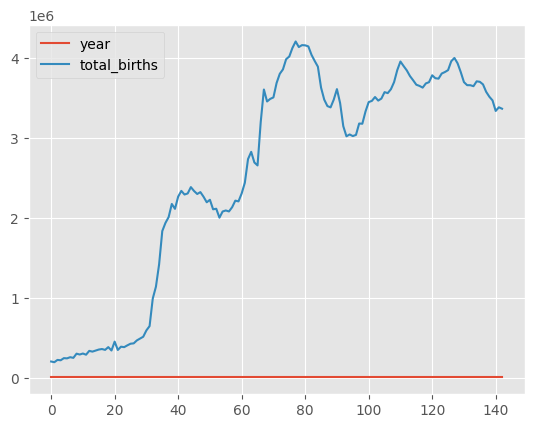

In [11]:
# use panda to do a quick overview over your data

yearly_births.plot()

## Step 2 - Plotting

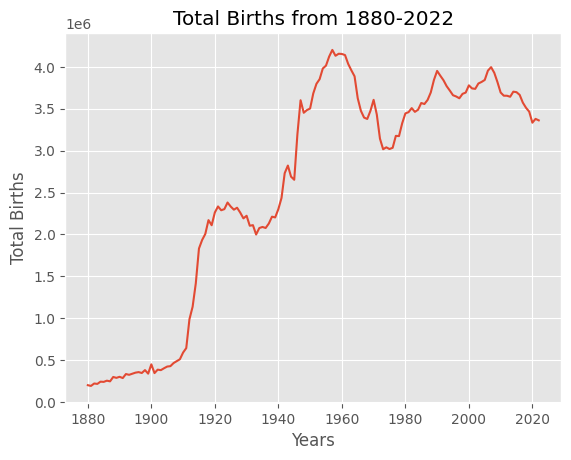

In [10]:
# use matplotliob to make a more detailed plot but adding a legend, title and and axis labels


from matplotlib import pyplot as plt

plt.style.use('ggplot')
plt.title('Total Births from 1880-2022')
plt.ylabel('Total Births')
plt.xlabel('Years')

x_vals = yearly_births['year']
y_vals = yearly_births['total_births']

plt.plot(x_vals, y_vals, label='Total Births from 1880-2022')